In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# open a root file and make an array of all TH1F within a TList
filename = "../sexaquark/attempts/local_signalMC_18qr_test_kalmanE1.8/AnalysisResults.root" # signal + bkg sim
file = uproot.open(filename)
tracks_histograms = file["Tracks_Hists/"]
v0s_histograms = file["V0s_Hists/"]
sexaquarks_histograms = file["Sexaquarks_Hists/"]

# map names to histograms
tracks_hist_dict = {hist.name: hist for hist in tracks_histograms}
v0s_hist_dict = {hist.name: hist for hist in v0s_histograms}
sexaquarks_hist_dict = {hist.name: hist for hist in sexaquarks_histograms}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Tracks

In [89]:
def plot_tracks_bookkeep(particle_name):
    plt.figure(figsize=(10, 8))
    hist_name = f"{particle_name}_Bookkeep"
    values, edges = tracks_hist_dict[hist_name].to_numpy()
    n_xbins = len(edges) - 1
    plt.hist(edges[:-1], edges, weights=values, alpha=0.5, label=hist_name, histtype='bar', edgecolor=colors[0], linewidth=2)
    plt.yscale('log')
    plt.ylim(top=5*np.max(values))
    tick_positions = [i + 0.5 for i in range(n_xbins)]
    meaning = {0: "mc gen.",
               10: "secondary mc gen.",
               20: "signal mc gen.",
               30: "effect of cuts on found",
               50: "found tracks that passed all cuts",
               60: "effect of cuts on true tracks",
               80: "found true tracks that passed all cuts",
               90: "effect of cuts on secondary tracks",
               110: "found secondary tracks that passed all cuts",
               120: "effect of cuts on signal tracks",
               140: "found signal tracks that passed all cuts"}
    tick_labels = [meaning[int(i)] if i in meaning else "" for i in range(n_xbins)]
    plt.xticks(tick_positions, tick_labels, rotation=90)
    for key in meaning.keys():
        if values[key] > 0:
            plt.text(key, values[key], f"{values[key]:.0f}", ha='center', va='bottom', fontsize='small')
    plt.legend()
    plt.tight_layout()
    plt.show()

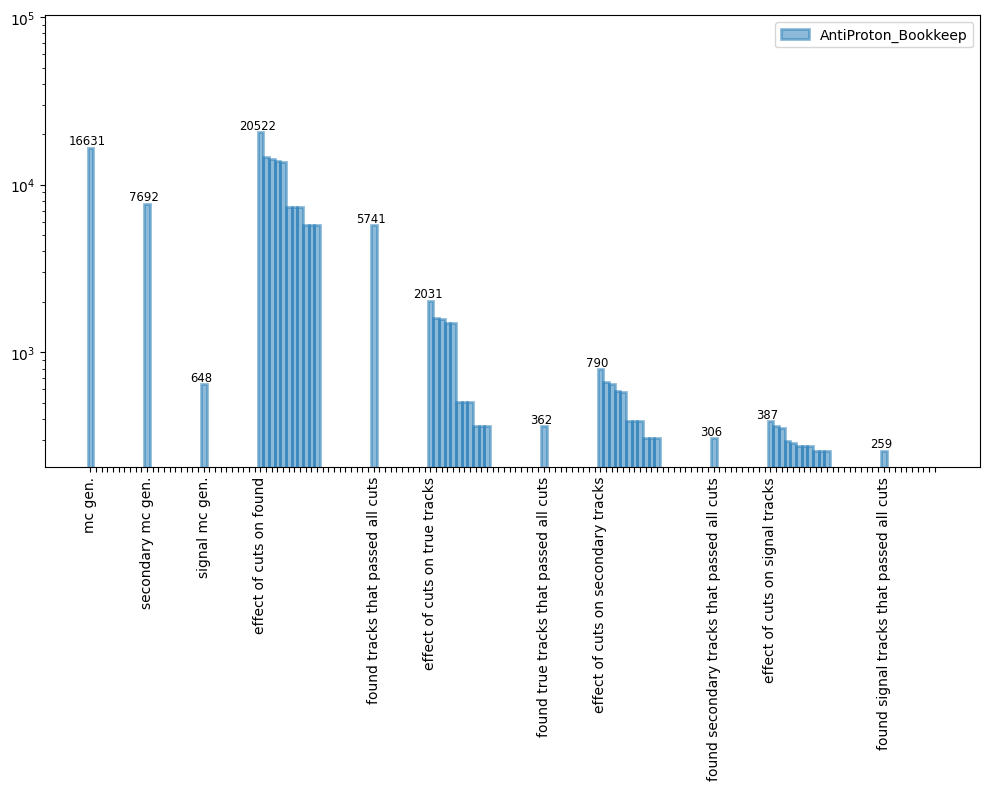

In [94]:
plot_tracks_bookkeep("AntiProton")

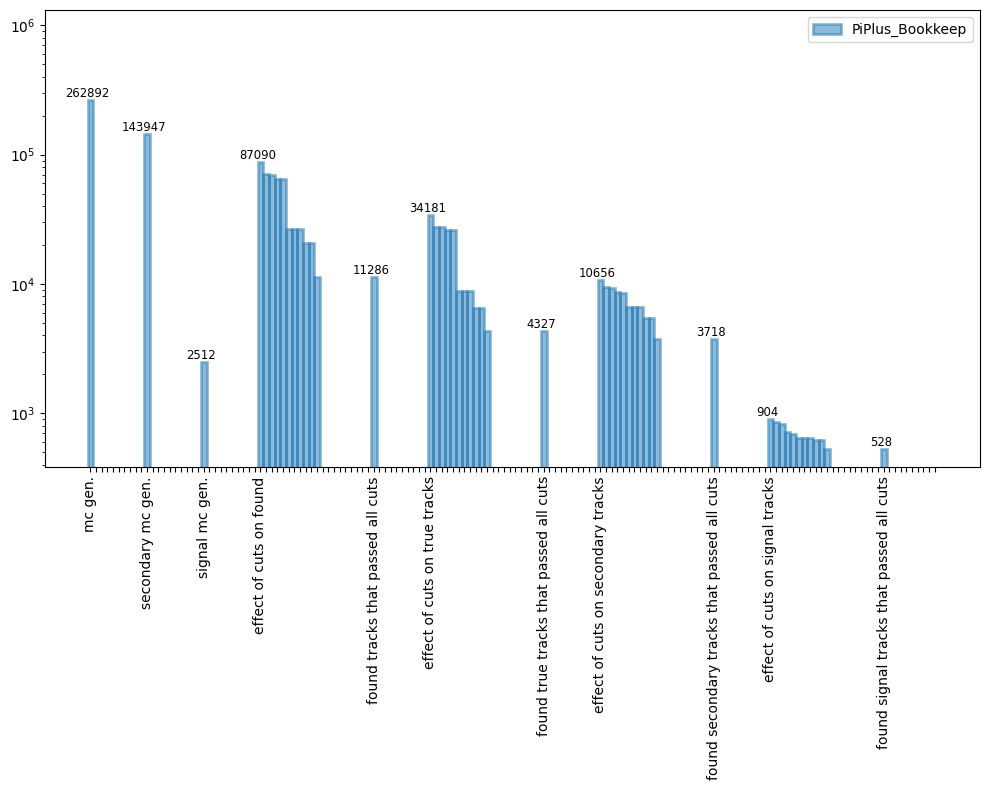

In [91]:
plot_tracks_bookkeep("PiPlus")

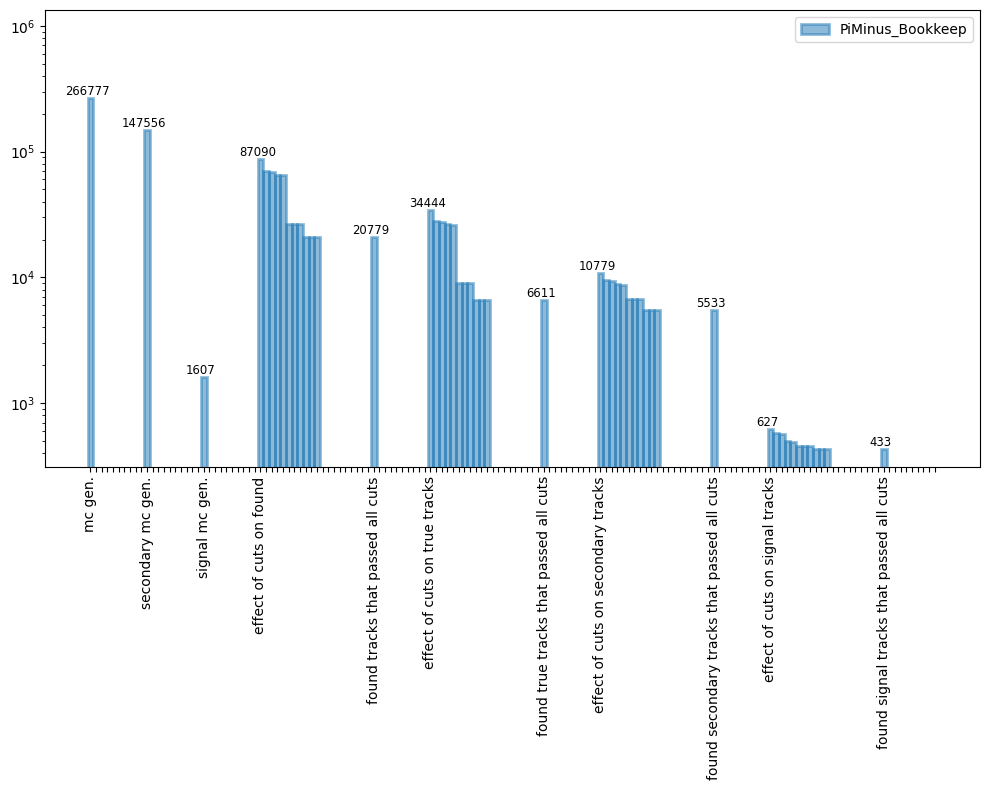

In [92]:
plot_tracks_bookkeep("PiMinus")

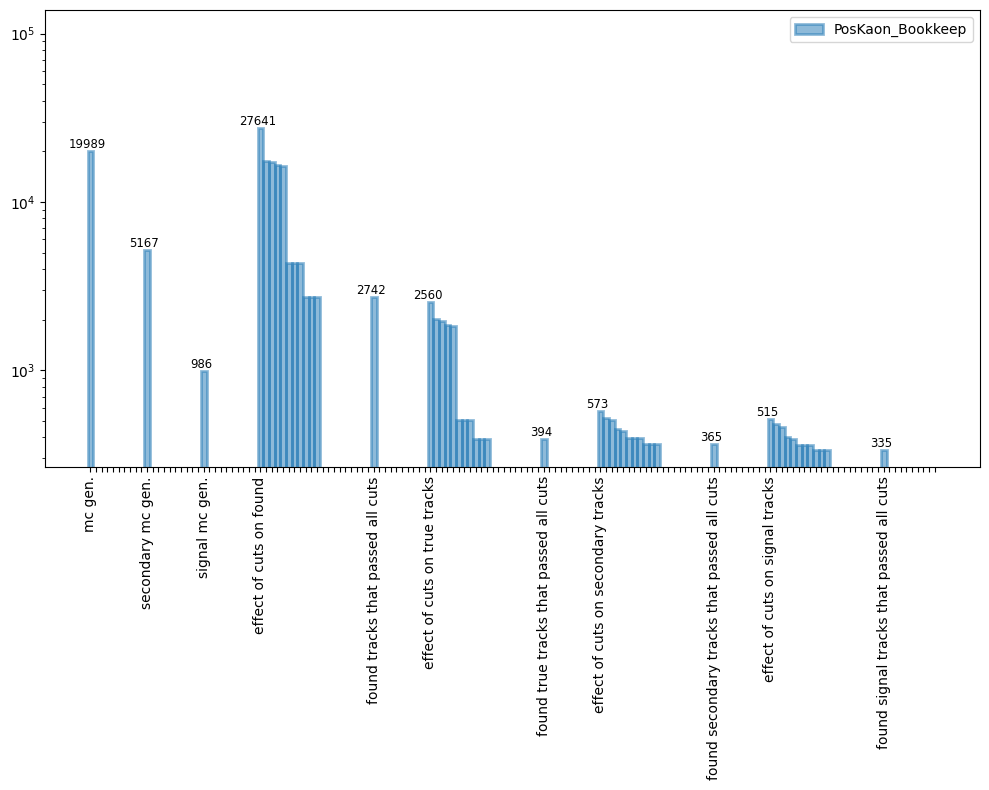

In [93]:
plot_tracks_bookkeep("PosKaon")

### V0s

In [85]:
def plot_v0s_bookkeep(v0_name):
    plt.figure(figsize=(10, 8))
    hist_name = f"{v0_name}_Bookkeep"
    values, edges = v0s_hist_dict[hist_name].to_numpy()
    n_xbins = len(edges) - 1
    plt.hist(edges[:-1], edges, weights=values, alpha=0.5, label=hist_name, histtype='bar', edgecolor=colors[0], linewidth=2)
    plt.yscale('log')
    plt.ylim(top=5*np.max(values))
    tick_positions = [i + 0.5 for i in range(n_xbins)]
    meaning = {0: "mc gen.",
               10: "secondary mc gen.",
               20: "signal mc gen.",
               30: "findable true V0s",
               40: "findable true secondary V0s",
               50: "findable true signal V0s",
               60: "effect of cuts on found",
               80: "found V0s that passed all cuts",
               90: "effect of cuts on true V0s",
               110: "found true V0s that passed all cuts",
               120: "effect of cuts on secondary V0s",
               140: "found secondary V0s that passed all cuts",
               150: "effect of cuts on signal V0s",
               170: "found signal V0s that passed all cuts"}
    tick_labels = [meaning[int(i)] if i in meaning else "" for i in range(n_xbins)]
    plt.xticks(tick_positions, tick_labels, rotation=90)
    for key in meaning.keys():
        if values[key] > 0:
            plt.text(key, values[key], f"{values[key]:.0f}", ha='center', va='bottom', fontsize='small')
    plt.legend()
    plt.tight_layout()
    plt.show()

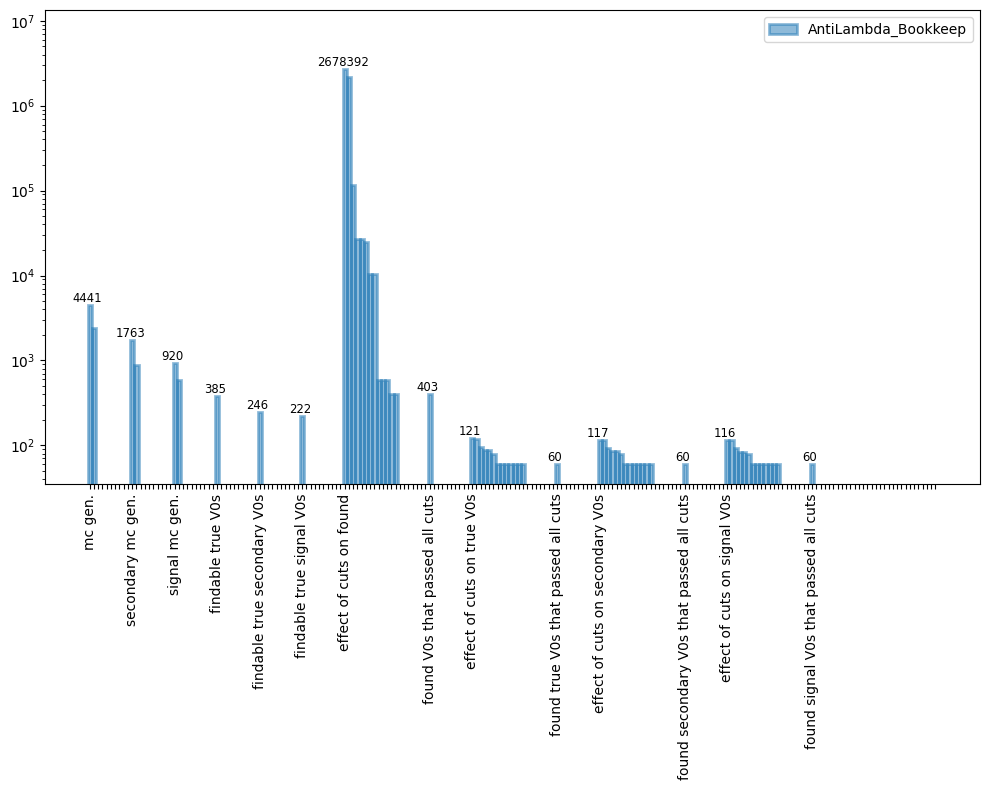

In [86]:
plot_v0s_bookkeep("AntiLambda")

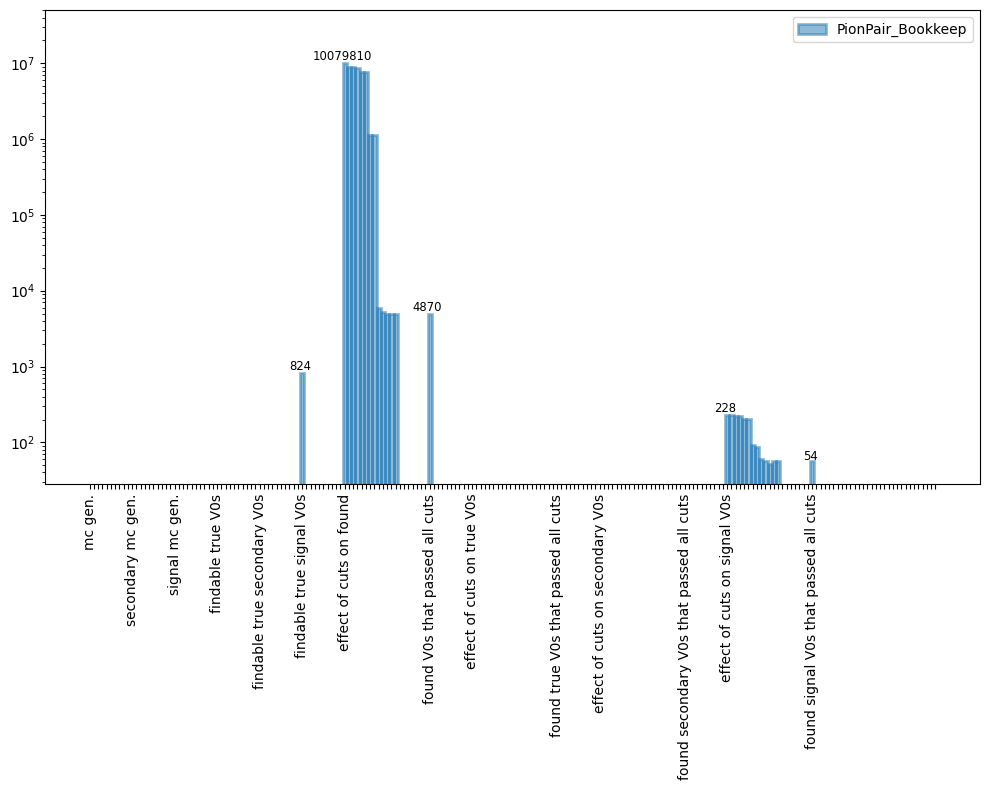

In [87]:
plot_v0s_bookkeep("PionPair")

In [ ]:
plot_v0s_bookkeep("KaonZeroShort")

### Anti-Sexaquark Candidates

In [35]:
def plot_antisexaquarks_bookkeep():
    plt.figure(figsize=(10, 8))
    hist_name = "AntiSexaquarks_Bookkeep"
    values, edges = sexaquarks_hist_dict[hist_name].to_numpy()
    n_xbins = len(edges) - 1
    plt.hist(edges[:-1], edges, weights=values, alpha=0.5, label=hist_name, histtype='bar', edgecolor=colors[0], linewidth=2)
    plt.yscale('log')
    plt.ylim(top=5*np.max(values))
    tick_positions = [i + 0.5 for i in range(n_xbins)]
    meaning = {0: "mc gen.",
               10: "findable",
               20: "effect of cuts on found candidates",
               50: "found candidates that passed all cuts",
               60: "effect of cuts on signal candidates",
               90: "found signal candidates that passed all cuts"}
    tick_labels = [meaning[int(i)] if i in meaning else "" for i in range(n_xbins)]
    plt.xticks(tick_positions, tick_labels, rotation=90)
    for i, value in enumerate(values):
        if tick_labels[i] != "":
            plt.text(tick_positions[i], value, f"{value:.0f}", ha='center', va='bottom', fontsize='small')
    plt.legend()
    plt.tight_layout()
    plt.show()

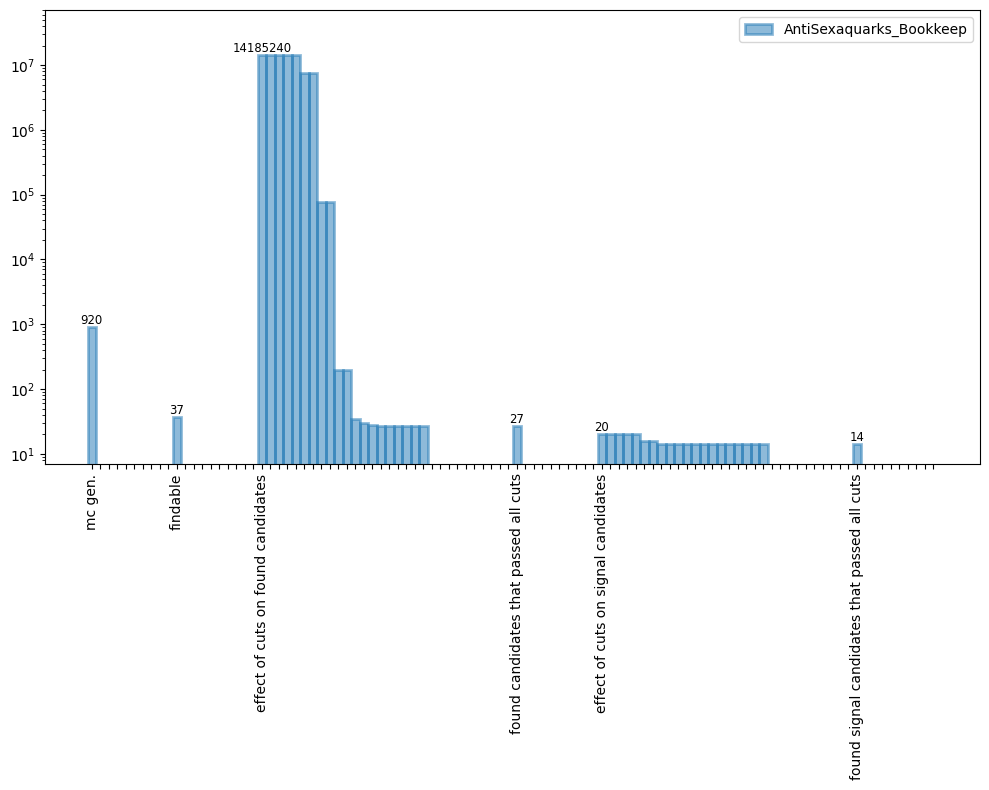

In [36]:
plot_antisexaquarks_bookkeep()

In [ ]:
def plot_mass():
    particles = ["AntiLambda", "KaonZeroShort"]
    x_titles = [r"$m(\bar{p},\pi^+)$ GeV/$c^{2}$", r"$m(\pi^-,\pi^+)$ GeV/$c^{2}$"]
    plt.figure(figsize=(5 * (1 + len(particles)), 5))

    for i, particle_name, x_title, color in zip(range(1, 1 + len(particles)), particles, x_titles, colors):
        hist_name = f"Found_All_{particle_name}_Mass"
        values, edges = hist_dict[hist_name].to_numpy()
        plt.subplot(1, 1 + len(particles), i + 1)

        label_name = hist_name
        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=color, label=label_name)

        avg = np.average(edges[:-1], weights=values)
        n_entries = np.sum(values)
        first_bin = np.where(values > 0)[0][0]
        last_bin = np.where(values > 0)[0][-1]
        stats = f"Entries: {n_entries:.0f}\nAverage: {avg:.2f}"
        plt.hist(edges[:-1], edges, alpha=0., label=stats) # invisible histogram to show stats on the legend

        plt.ylabel("Counts", loc='top')

        plt.ylim(top=1.2*np.max(values))
        plt.xlabel(x_title, loc='right')

        plt.legend(fontsize='small')

    plt.tight_layout()

    plt.show()

In [ ]:
plot_mass()

In [ ]:
def plot_interaction_props():
    particle = "AntiSexaquark"
    variables = ["Mass", "Pt", "Radius"]
    # variables = ["Rapidity", "CPAwrtPV", "DCAwrtPV"]
    plt.figure(figsize=(5 * (1 + len(variables)), 5))

    for i, var in zip(range(1, 1 + len(variables)), variables):
        hist_name = f"MCGen_All_{particle}_{var}"
        values, edges = hist_dict[hist_name].to_numpy()
        plt.subplot(1, 1 + len(variables), i + 1)

        label_name = hist_name
        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=colors[i-1], label=label_name)
        # plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=colors[i+2], label=label_name)

        avg = np.average(edges[:-1], weights=values)
        n_entries = np.sum(values)
        first_bin = np.where(values > 0)[0][0]
        last_bin = np.where(values > 0)[0][-1]
        stats = f"Entries: {n_entries:.0f}\nAverage: {avg:.2f}"
        plt.hist(edges[:-1], edges, alpha=0., label=stats) # invisible histogram to show stats on the legend

        plt.ylabel("Counts", loc='top')

        plt.ylim(top=1.2*np.max(values))

        plt.legend(fontsize='small')

    plt.tight_layout()

    plt.show()

In [ ]:
plot_interaction_props()